In [1]:
import re
import json
import emoji
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from spellchecker import SpellChecker

In [2]:
with open('MarketingAnalytics1.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

In [3]:
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
#initializing spellchecker
spell = SpellChecker()

# Custom list of stopwords to retain
custom_stopwords = ["have", "inside", "not", "no", "never", "none", "nobody", "no one", "nowhere", "neither", "nor", "hardly", "scarcely", "barely", "rarely",]



In [5]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = emoji.demojize(text)  # Convert emojis to their text representation
    text = re.sub(r'[^\w\s.]', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = word_tokenize(text)

    # Define a customized NLTK stopwords list
    stop_words = set(stopwords.words("english"))
    
    # Update the NLTK stopwords list to retain words from custom_stopwords
    for word in custom_stopwords:
        stop_words.discard(word)

    # Remove single-letter words and other common stopwords
    words = [word for word in words if word not in stop_words and len(word) > 1]
    
    # Join the words back into a cleaned text
    cleaned_text = ' '.join(words)

    return cleaned_text

In [6]:
def clean_comments(comments):
    for comment in comments:
        comment["body"] = clean_text(comment.get("body", ""))
        clean_comments(comment.get("replies", []))  # Recursively clean replies

# Clean the text data
for post in data:
    post["title"] = clean_text(post.get("title", ""))
    post["self_text"] = clean_text(post.get("self_text", ""))
    clean_comments(post["comments"])  # Clean all levels of comments

# Store the cleaned data in a new JSON file
with open("cleaned_data_M1.json", "w", encoding='utf-8') as json_file:
    json.dump(data, json_file, ensure_ascii=False, indent=4)

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [8]:
with open('cleaned_data_M1.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

combined_text = " ".join([post['title'] + " " + post['self_text'] for post in data])


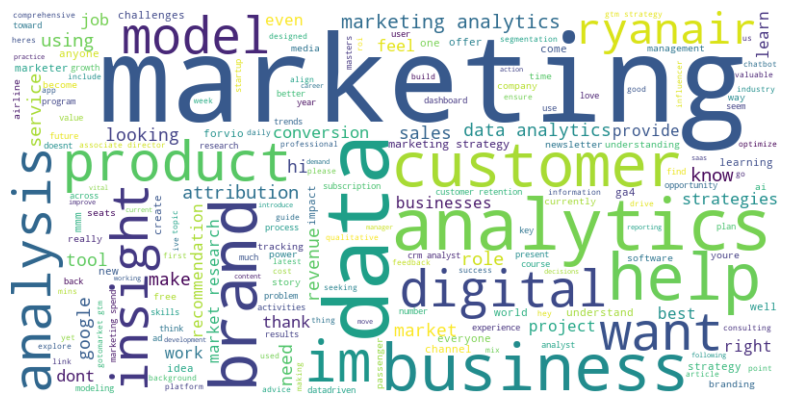

In [9]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the generated word cloud:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()